In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans  

In [3]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No",1:"Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

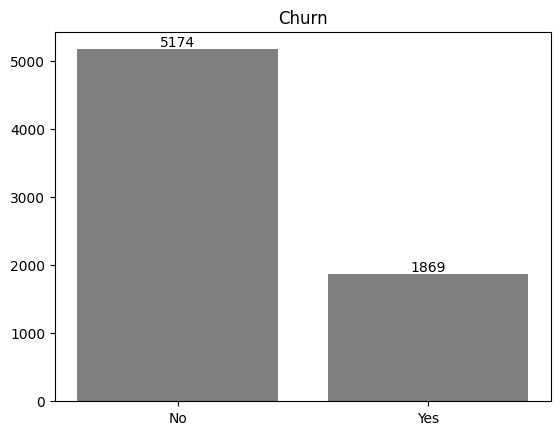

In [8]:
churn_count = df['Churn'].value_counts().sort_index()
plt.bar(("No","Yes"),(churn_count[0],churn_count[1]), color="grey")
plt.title("Churn")
for i, value in enumerate((churn_count[0],churn_count[1])):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

In [9]:
df['gender'].value_counts().sort_index()

Female    3488
Male      3555
Name: gender, dtype: int64

In [10]:
def CountPlot_table(feature):
    sns.countplot(x=feature,hue="Churn",data=df,palette="Paired",edgecolor="black",order=df[feature].value_counts().index)
    sns.despine()
    temp_table = pd.DataFrame(round(df.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

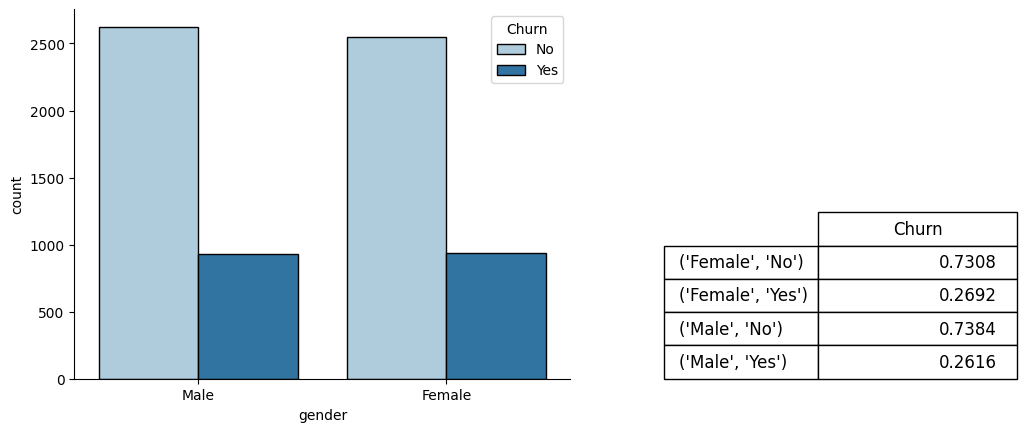

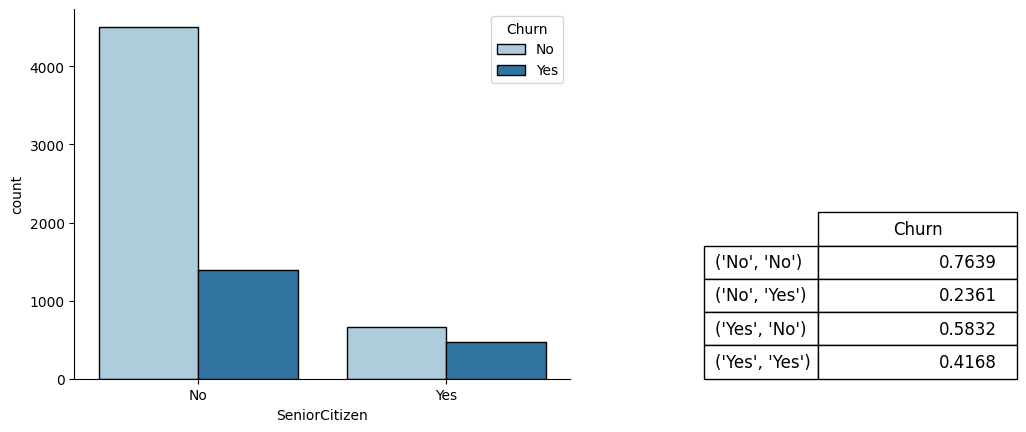

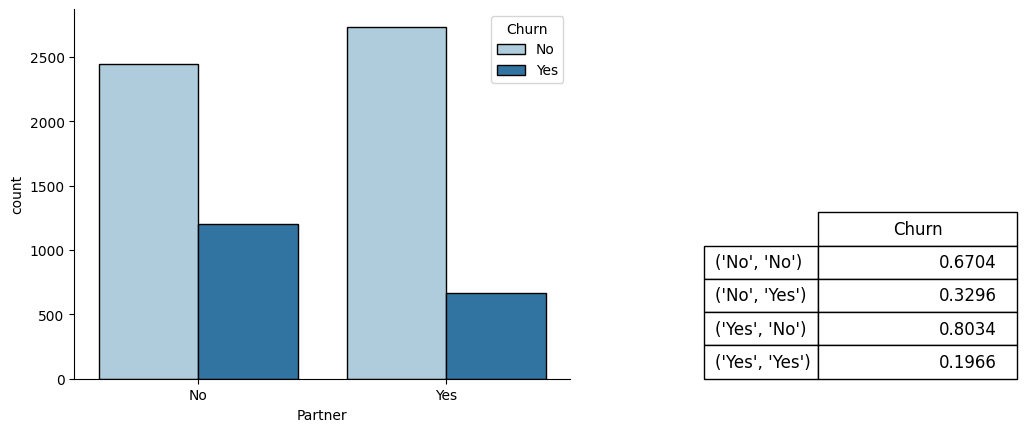

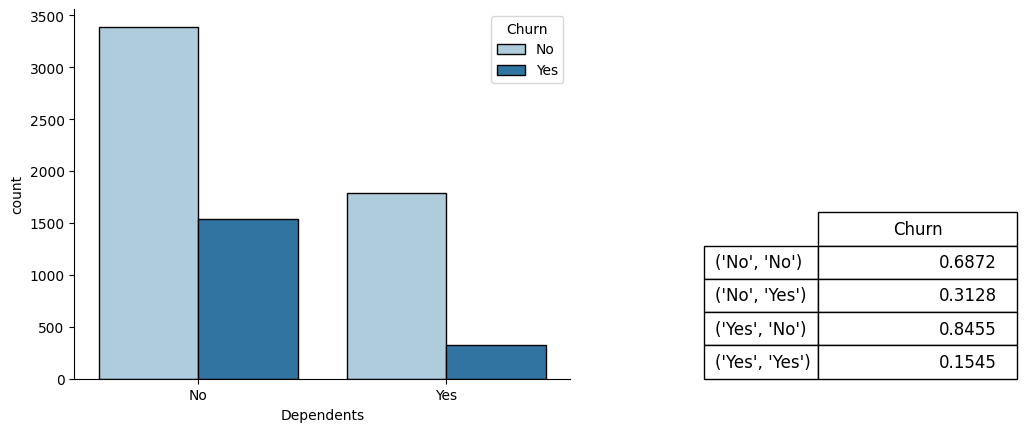

In [11]:
features = ['gender','SeniorCitizen','Partner','Dependents']
for feature in features:
    CountPlot_table(feature)

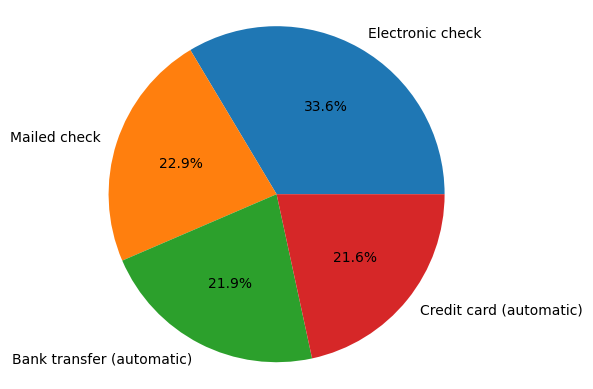

In [12]:
data = df['PaymentMethod'].value_counts()
types = df['PaymentMethod'].unique()
plt.pie(data,labels=types,autopct='%.1f%%')
plt.axis('equal')
plt.show()

In [13]:
df['PaymentMethod'].value_counts().sort_index()

Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: int64

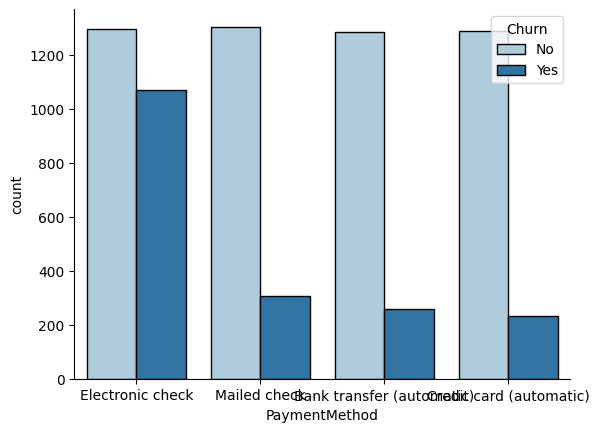

In [18]:
ax= sns.countplot(x='PaymentMethod',hue="Churn",data=df,palette="Paired",edgecolor="black",order=df['PaymentMethod'].value_counts().index)
sns.despine()
plt.show()

Text(0.6, 0.92, 'Payment Method vs Churn')

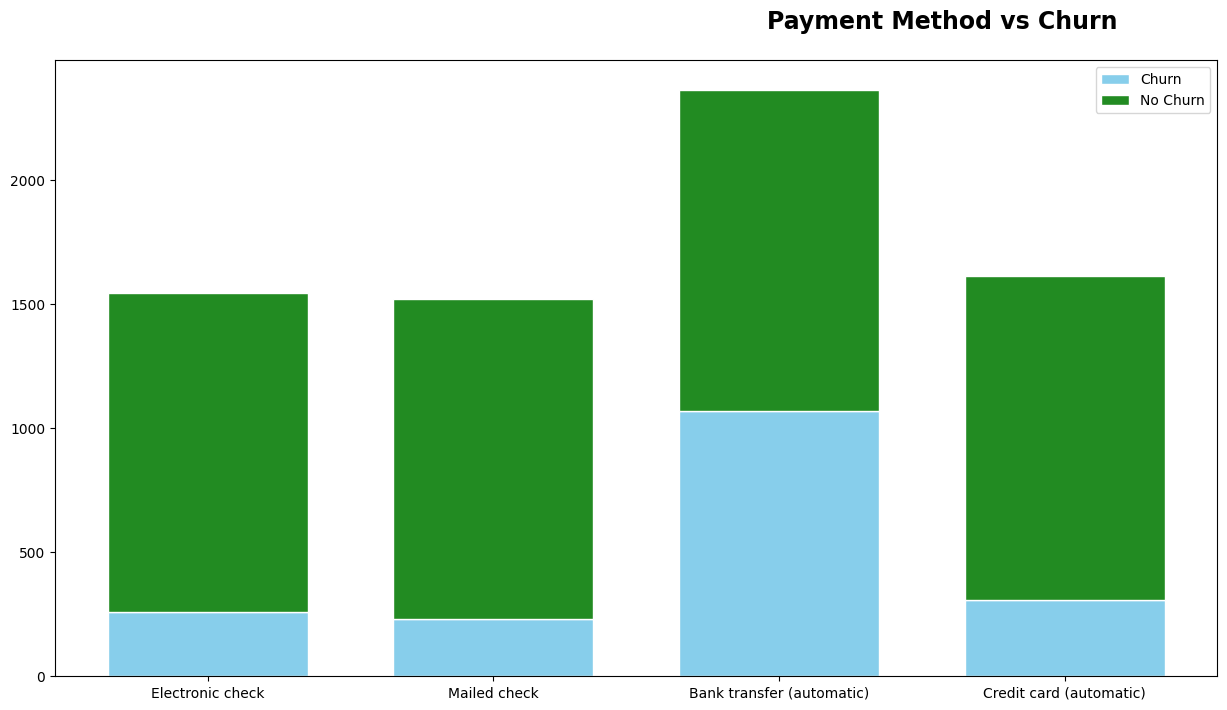

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15, 8))

yes_churn = [258, 232, 1071, 308]
no_churn = [1286, 1290,1294, 1304]
ax.bar(types, yes_churn, label='Churn', color = 'skyblue',edgecolor='white', width = 0.7)
ax.bar(types, no_churn, label='No Churn', bottom=yes_churn, color = 'forestgreen', edgecolor='white', width = 0.7)
ax.legend()
fig.text(0.60, 0.92, 'Payment Method vs Churn', fontsize=17, fontweight='bold')    

In [16]:
df2 = df.copy()

***

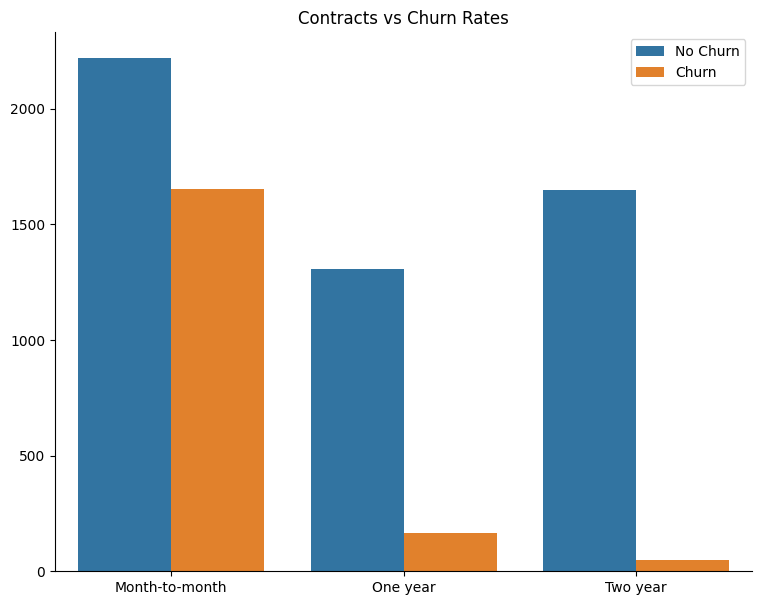

In [20]:
#Checking the contracts
plt.figure(figsize=(9,7))
ax = sns.countplot(x="Contract", hue="Churn", data=df).set(title='Contracts vs Churn Rates', xlabel=None, ylabel = None)
sns.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

So month-to-month contract customers have higher churn rate.

***

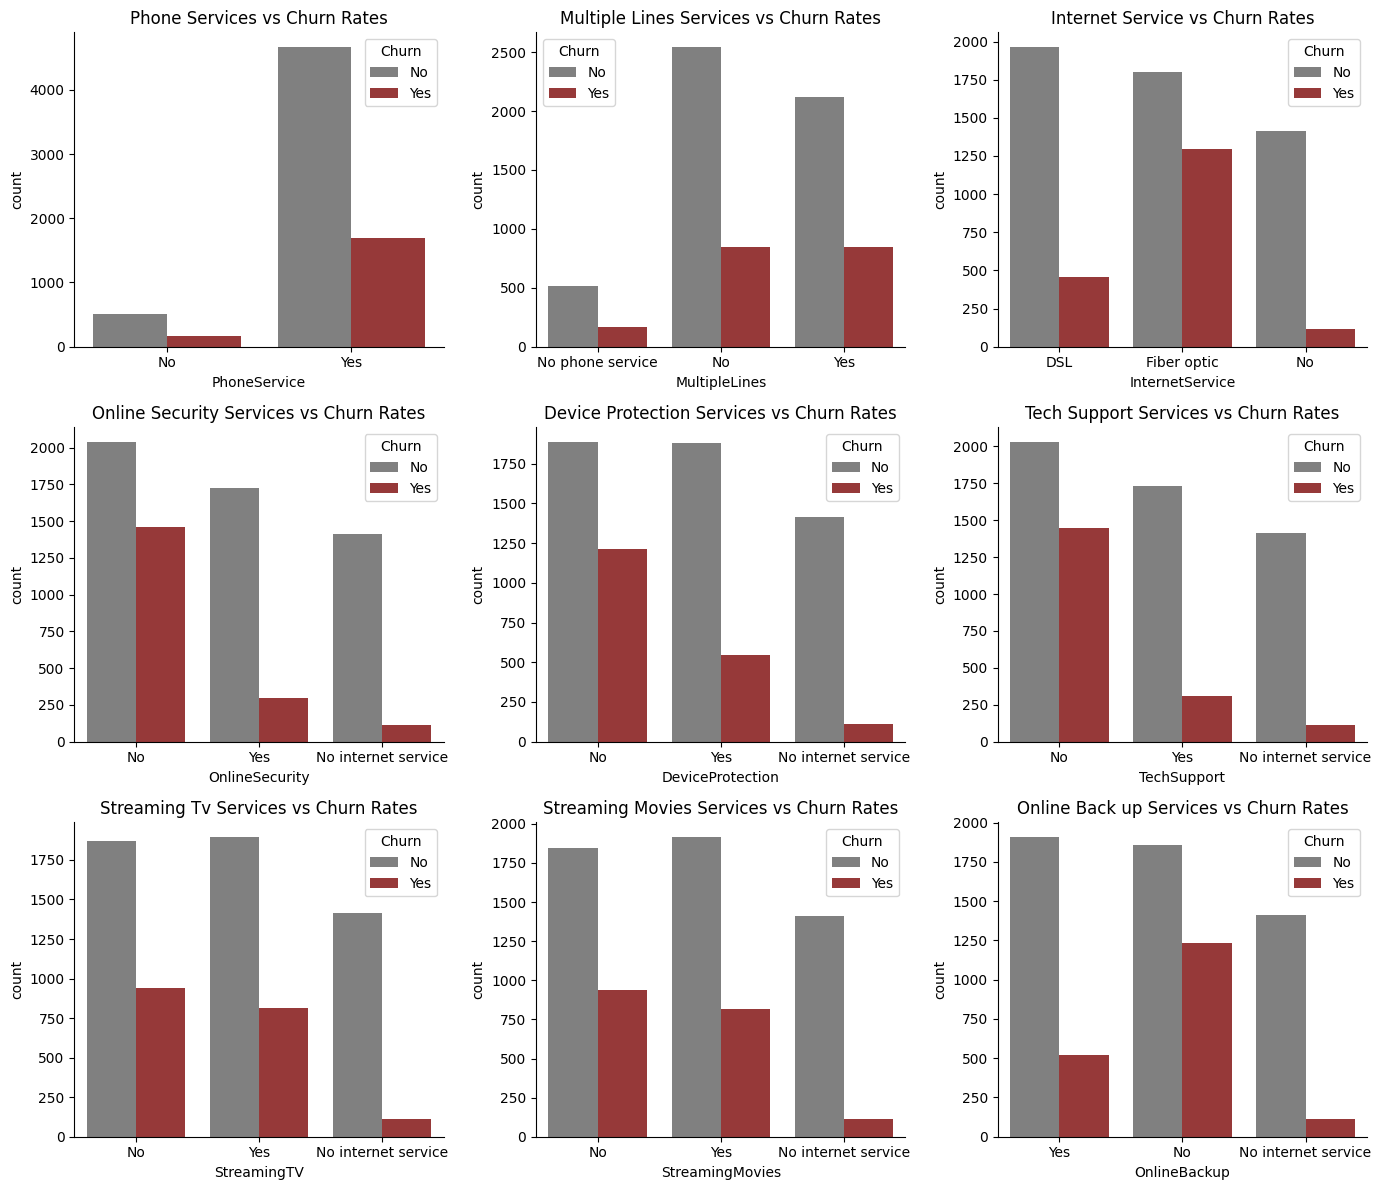

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
# Gray for No Churn, highlight Churn!
colors = ["Grey", "Brown"]
# Set custom color palette
sns.set_palette(sns.color_palette(colors))
# Graphing
sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0]).set(title='Phone Services vs Churn Rates')
sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn Rates')
sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2]).set(title='Internet Service vs Churn Rates')
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0]).set(title='Online Security Services vs Churn Rates')
sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1]).set(title='Device Protection Services vs Churn Rates')
sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2]).set(title='Tech Support Services vs Churn Rates')
sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0]).set(title='Streaming Tv Services vs Churn Rates')
sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn Rates')
sns.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2]).set(title='Online Back up Services vs Churn Rates')
sns.despine()
plt.tight_layout()
plt.show()